In [ ]:
#Twitter Sentimeny Analysis Using Python

In [ ]:
#import the libraries needed
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Twitter API keys and Tokens
Access_token=""
Access_token_secret=""
Consumer_key=""
Consumer_secret=""

In [ ]:
#Creating OAuthHandler instance and make it equipped with access token
auth = tweepy.OAuthHandler(Consumer_key, Consumer_secret)
auth.set_access_token(Access_token, Access_token_secret)
api= tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
#Verifying Our credentials using exception handling
try: 
  api.verify_credentials()
  print('Success')
except:
  print('failed')

Success


In [ ]:
#Taking number of tweets we want to analyze as input
num= int(input("Enter the number of tweets you want to analyze:"))

Enter the number of tweets you want to analyze:500


In [ ]:
#Taking hashtag or keyword as an input
searchTerm = input("Enter Keyword/Tag to search about: ")
search_query = searchTerm

Enter Keyword/Tag to search about: #NarendraModi


In [ ]:
# get tweets from the API
tweets = tweepy.Cursor(api.search,q=search_query,lang="en",since="2020-09-16").items(num)
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 500


In [ ]:
#Fetching the status of tweets using api.get_status() method of api class in tweepy module
text = api.get_status(id=tweet.id, tweet_mode='extended').full_text

In [ ]:
tweets_df = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name,'user_description': tweet.user.description,'date': tweet.created_at,'text': text, 'hashtags': [hashtags if hashtags else None],}))
    tweets_df = tweets_df.reset_index(drop=True)
# show the dataframe
tweets_df.head()


,user_name,user_description,date,text,hashtags
0,Ayush Sinha.,@StudyTi30020197\n\nPublic Speaker.lL\nPolitic...,2022-07-24 17:45:22,@narendramodi \nIndia is on the way from Democ...,[NarendraModi]
1,Arun Kumar,student,2022-07-24 17:39:55,RT @Boss42265174: #टुच्चा_मोदी #NarendraModi\n...,"[टुच्चा_मोदी, NarendraModi]"
2,Atman Pradhan,,2022-07-24 17:39:39,RT @LallanT39919882: #NarendraModi Promise To...,"[NarendraModi, DMKYouthWing]"
3,Hira,,2022-07-24 17:39:34,RT @Boss42265174: #FileAbhiWithCleartax\n#Arvi...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr..."
4,Priyansh Mishra,,2022-07-24 17:39:33,All countries increase their funds in science ...,"[PMOIndia, NarendraModi]"


In [ ]:
#Method to remove hashtags, retweets, mentions and urls from the tweets
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text) #r tells that it is a raw string
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text
tweets_df['text']= tweets_df['text'].apply(cleanText)
tweets_df

,user_name,user_description,date,text,hashtags
0,Ayush Sinha.,@StudyTi30020197\n\nPublic Speaker.lL\nPolitic...,2022-07-24 17:45:22,\nIndia is on the way from Democracy to Autoc...,[NarendraModi]
1,Arun Kumar,student,2022-07-24 17:39:55,: टुच्चा_मोदी NarendraModi\n\nIt is totally th...,"[टुच्चा_मोदी, NarendraModi]"
2,Atman Pradhan,,2022-07-24 17:39:39,: NarendraModi Promise To Give 2Cr Jobs Every...,"[NarendraModi, DMKYouthWing]"
3,Hira,,2022-07-24 17:39:34,: FileAbhiWithCleartax\nArvindKejriwal\n\nNare...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr..."
4,Priyansh Mishra,,2022-07-24 17:39:33,All countries increase their funds in science ...,"[PMOIndia, NarendraModi]"
...,...,...,...,...,...
495,Jatiñ Gautám,Proud Indian🇮🇳❤️ || 26 || Memes & Music💖💞 || P...,2022-07-24 13:33:19,: FileAbhiWithCleartax\nArvindKejriwal\n\nNare...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr..."
496,#hind deepam,सेवा परमो धर्म. ...,2022-07-24 13:33:15,: TamilNadu CM MKStalin wrote to Prime Ministe...,"[TamilNadu, MKStalin, NarendraModi]"
497,vinay jakhar,,2022-07-24 13:33:08,: FileAbhiWithCleartax\nArvindKejriwal\n\nNare...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr..."
498,Jai hind,Love = Indian army,2022-07-24 13:32:46,: FileAbhiWithCleartax\nArvindKejriwal\n\nNare...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr..."


In [ ]:
#Calculating subjectivity of tweets using TextBlob library 
def getSub(text):
  return TextBlob(text).sentiment.subjectivity

#Calculating polarity of tweets using TextBlob library 
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

tweets_df['Subjectivity']=tweets_df['text'].apply(getSub)
tweets_df['Polarity']=tweets_df['text'].apply(getPolarity)
tweets_df

,user_name,user_description,date,text,hashtags,Subjectivity,Polarity
0,Ayush Sinha.,@StudyTi30020197\n\nPublic Speaker.lL\nPolitic...,2022-07-24 17:45:22,\nIndia is on the way from Democracy to Autoc...,[NarendraModi],0.000000,0.000000
1,Arun Kumar,student,2022-07-24 17:39:55,: टुच्चा_मोदी NarendraModi\n\nIt is totally th...,"[टुच्चा_मोदी, NarendraModi]",0.583333,0.000000
2,Atman Pradhan,,2022-07-24 17:39:39,: NarendraModi Promise To Give 2Cr Jobs Every...,"[NarendraModi, DMKYouthWing]",0.000000,0.000000
3,Hira,,2022-07-24 17:39:34,: FileAbhiWithCleartax\nArvindKejriwal\n\nNare...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr...",0.000000,0.000000
4,Priyansh Mishra,,2022-07-24 17:39:33,All countries increase their funds in science ...,"[PMOIndia, NarendraModi]",0.000000,0.000000
...,...,...,...,...,...,...,...
495,Jatiñ Gautám,Proud Indian🇮🇳❤️ || 26 || Memes & Music💖💞 || P...,2022-07-24 13:33:19,: FileAbhiWithCleartax\nArvindKejriwal\n\nNare...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr...",0.000000,0.000000
496,#hind deepam,सेवा परमो धर्म. ...,2022-07-24 13:33:15,: TamilNadu CM MKStalin wrote to Prime Ministe...,"[TamilNadu, MKStalin, NarendraModi]",0.241667,0.133333
497,vinay jakhar,,2022-07-24 13:33:08,: FileAbhiWithCleartax\nArvindKejriwal\n\nNare...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr...",0.000000,0.000000
498,Jai hind,Love = Indian army,2022-07-24 13:32:46,: FileAbhiWithCleartax\nArvindKejriwal\n\nNare...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr...",0.000000,0.000000


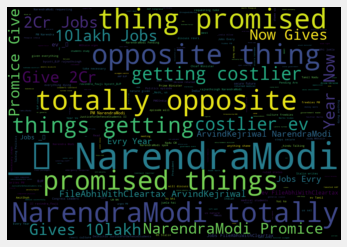

In [ ]:
#representing the data in worldcloud form
allWords = ' '.join( [twts for twts in tweets_df['text']])
wordCloud = WordCloud(width=1000,height=700, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#defining as positive, negative and neutral
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

tweets_df['Analysis']=tweets_df['Polarity'].apply(getAnalysis)

tweets_df

,user_name,user_description,date,text,hashtags,Subjectivity,Polarity,Analysis
0,Ayush Sinha.,@StudyTi30020197\n\nPublic Speaker.lL\nPolitic...,2022-07-24 17:45:22,\nIndia is on the way from Democracy to Autoc...,[NarendraModi],0.000000,0.000000,Neutral
1,Arun Kumar,student,2022-07-24 17:39:55,: टुच्चा_मोदी NarendraModi\n\nIt is totally th...,"[टुच्चा_मोदी, NarendraModi]",0.583333,0.000000,Neutral
2,Atman Pradhan,,2022-07-24 17:39:39,: NarendraModi Promise To Give 2Cr Jobs Every...,"[NarendraModi, DMKYouthWing]",0.000000,0.000000,Neutral
3,Hira,,2022-07-24 17:39:34,: FileAbhiWithCleartax\nArvindKejriwal\n\nNare...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr...",0.000000,0.000000,Neutral
4,Priyansh Mishra,,2022-07-24 17:39:33,All countries increase their funds in science ...,"[PMOIndia, NarendraModi]",0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...
495,Jatiñ Gautám,Proud Indian🇮🇳❤️ || 26 || Memes & Music💖💞 || P...,2022-07-24 13:33:19,: FileAbhiWithCleartax\nArvindKejriwal\n\nNare...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr...",0.000000,0.000000,Neutral
496,#hind deepam,सेवा परमो धर्म. ...,2022-07-24 13:33:15,: TamilNadu CM MKStalin wrote to Prime Ministe...,"[TamilNadu, MKStalin, NarendraModi]",0.241667,0.133333,Positive
497,vinay jakhar,,2022-07-24 13:33:08,: FileAbhiWithCleartax\nArvindKejriwal\n\nNare...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr...",0.000000,0.000000,Neutral
498,Jai hind,Love = Indian army,2022-07-24 13:32:46,: FileAbhiWithCleartax\nArvindKejriwal\n\nNare...,"[FileAbhiWithCleartax, ArvindKejriwal, Narendr...",0.000000,0.000000,Neutral


In [ ]:
#positive tweets
j=1
sortedDF = tweets_df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if( sortedDF['Analysis'][i]=='Positive'):
     print(str(j) + ')' +sortedDF['text'][i])
     print()
     j=j+1

1): Nothing is important than camera...!!
NarendraModi RamNathKovind CameraJeevi 

2)5 Best Government Portals for MSMEs to Grow Your Business

See: 

isrgrajan SundayMotivation Entrepreneurship MSME NarendraModi PMModi 

3): Tamil Nadu CM MK Stalin writes to PM NarendraModi, requesting him to take necessary steps to secure the future of the me…

4): JusticeForDefenceStudents Army exam is my right as i had completed my physical and medical successfully and u have to…

5)PM Modi hails President Kovind's address as 'inspiring'   NarendraModi

6)5 Best Government Portals for MSMEs to Grow Your Business

See: 

SundayMotivation ISRGKB Entrepreneurship MSME NarendraModi PMModi 

7): Tamil Nadu CM MK Stalin writes to PM NarendraModi, requesting him to take necessary steps to secure the future of the me…

8)PM Narendra Modi Meets CMs of BJP-Ruled States, Emphasizes Better Implementation of Key Schemes 
   
NarendraModi BJP CMMeet Delhi 



9): JusticeForDefenceStudents Army exam is my right a

In [ ]:
#Negative tweets
j=1
sortedDF = tweets_df.sort_values(by=['Polarity'], ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+')'+sortedDF['text'][i])
    print()
    j=j+1

1)NarendraModi PMOIndia  Please don't kill India we are totally import dependent country. Again sadly we are expending the lowest amount on R&amp;D and the worst thing is that we are forcing the science and technology to stop in India by imposing GST.

2): Congress alleged that Smriti Irani's daughter was running an “illegal bar” in Goa and demanded that PM NarendraModi shoul…

3): The whole world is crazy about this man. ❤😍
 
NarendraModi 

4): DravidianStock will hate this but what to do, it is undeniable ...

NarendraModi 🦁 

5): DravidianStock will hate this but what to do, it is undeniable ...

NarendraModi 🦁 

6)DravidianStock will hate this but what to do, it is undeniable ...

NarendraModi 🦁 

7)PrimeMinister 
NarendraModi
narendarmodi

Respected Prime Minister Narendra Modi,
I write this letter with a heavy heart and an even heavier conscience. 

8)_inde: Shared video by Sanjay singh ( Akl ki andhi party) is fake. This is an edited video. 
Stay informed &amp; stay alert 
Presi

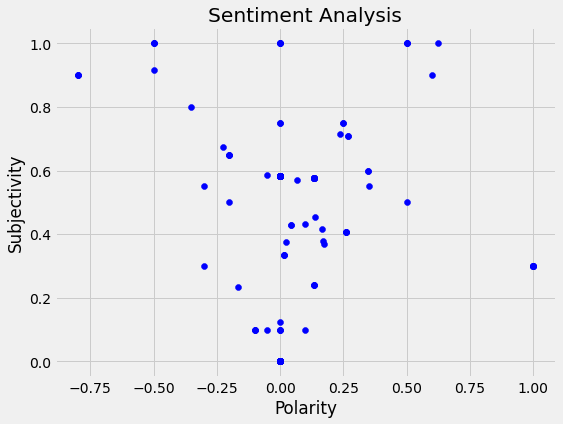

In [ ]:
#Scatter plot represenation of data
plt.figure(figsize=(8,6))
for i in range(0,tweets_df.shape[0]):
  plt.scatter(tweets_df['Polarity'][i],tweets_df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#percentage of positive tweets
ptweets = tweets_df[tweets_df.Analysis=='Positive']
ptweets = ptweets['text']

round((ptweets.shape[0]/tweets_df.shape[0])*100, 1)

10.6

In [ ]:
#percentage of negative
ntweets = tweets_df[tweets_df.Analysis=='Negative']
ntweets = ntweets['text']

round((ntweets.shape[0]/tweets_df.shape[0])*100,1)


4.2

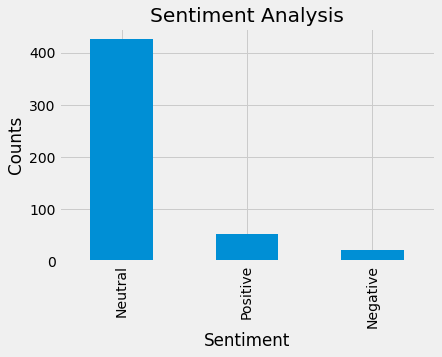

In [ ]:
#Bar graph representation of data
tweets_df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets_df['Analysis'].value_counts().plot(kind='bar')
plt.show()